## Importing libraries

In [1]:
# pip install seaborn

In [2]:
# pip install openpyxl

## 1. Load Data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.20.3', '1.3.4', '0.11.2', '3.4.3')

In [5]:
import pandas as pd
df = pd.read_csv('Cars.csv')
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# Check the shape of my data
df.shape

(8128, 13)

In [7]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
# Check Dtypes of my input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [10]:
df_copy = df.copy() # Save dataframe

In [11]:
#Name cut to appear only car brand name
df_copy['Car_Name'] = df_copy['name'].str.split(" ").str[0]
df_copy.drop(['name'], axis=1, inplace=True)
df_copy.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car_Name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [12]:
df_copy.drop(['torque'], axis = 1, inplace = True)
df_copy.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_Name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,Maruti


In [13]:
#Split value and unit of mileage, engine and max power
df_copy[["Mileage_Value","Mileage_Unit"]] = df_copy["mileage"].str.split(pat=' ', expand = True)
df_copy[["Engine_Value","Engine_Unit"]] = df_copy["engine"].str.split(pat=' ', expand = True)
df_copy[["Max_Power_Value","Max_Power_Unit"]] = df_copy["max_power"].str.split(pat=' ', expand = True)
df_copy.drop(["mileage","engine","max_power"], axis=1, inplace=True)
df_copy.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Car_Name,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.4,kmpl,1248,CC,74,bhp
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,kmpl,1498,CC,103.52,bhp
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.7,kmpl,1497,CC,78,bhp
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.0,kmpl,1396,CC,90,bhp
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.1,kmpl,1298,CC,88.2,bhp


In [14]:
#Re Arrange column
new_order = [
    'Car_Name', 'year', 'selling_price', 'km_driven', 'fuel', 
    'seller_type', 'transmission', 'owner', 'seats',
    'Mileage_Value', 'Mileage_Unit', 'Engine_Value', 'Engine_Unit',
    'Max_Power_Value', 'Max_Power_Unit'
]
new_df = df_copy[new_order]
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,kmpl,1248,CC,74,bhp
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,kmpl,1497,CC,78,bhp
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,kmpl,1396,CC,90,bhp
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,kmpl,1298,CC,88.2,bhp


In [15]:
#Remove car fuel CNG and LPG to remove a car which use different mileage system
new_df = new_df[new_df['fuel'].isin(['Diesel', 'Petrol'])]
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,kmpl,1248,CC,74,bhp
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,kmpl,1497,CC,78,bhp
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,kmpl,1396,CC,90,bhp
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,kmpl,1298,CC,88.2,bhp


In [16]:
# convert values of mileage into float
new_df['mileage'] = df['mileage'].str.split().str[0].astype(float)

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,kmpl,1248,CC,74,bhp,23.40
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp,21.14
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,kmpl,1497,CC,78,bhp,17.70
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,kmpl,1396,CC,90,bhp,23.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,kmpl,1298,CC,88.2,bhp,16.10


In [17]:
# convert values of mileage into float
new_df['Mileage_Value'] = df['mileage'].str.split().str[0].astype(float)

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248,CC,74,bhp,23.40
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp,21.14
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497,CC,78,bhp,17.70
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396,CC,90,bhp,23.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298,CC,88.2,bhp,16.10


In [18]:
# convert values of engine into float
new_df['engine'] = df['engine'].str.split().str[0].astype('float64')

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage,engine
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248,CC,74,bhp,23.40,1248.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498,CC,103.52,bhp,21.14,1498.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497,CC,78,bhp,17.70,1497.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396,CC,90,bhp,23.00,1396.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298,CC,88.2,bhp,16.10,1298.0


In [19]:
# convert values of engine into float
new_df['Engine_Value'] = df['engine'].str.split().str[0].astype('float64')

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage,engine
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248.0,CC,74,bhp,23.40,1248.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498.0,CC,103.52,bhp,21.14,1498.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497.0,CC,78,bhp,17.70,1497.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396.0,CC,90,bhp,23.00,1396.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298.0,CC,88.2,bhp,16.10,1298.0


In [20]:
# convert values of engine into float
new_df['Max_Power_Value'] = new_df['Max_Power_Value'].str.split().str[0].astype('float64')

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Max_Power_Value,Max_Power_Unit,mileage,engine
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,kmpl,1248.0,CC,74.00,bhp,23.40,1248.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,kmpl,1498.0,CC,103.52,bhp,21.14,1498.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,kmpl,1497.0,CC,78.00,bhp,17.70,1497.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,kmpl,1396.0,CC,90.00,bhp,23.00,1396.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,kmpl,1298.0,CC,88.20,bhp,16.10,1298.0


In [21]:
# Arrange the columns
new_df = new_df.reindex(columns = ['Car_Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner', 'seats', 'Mileage_Value', 'Engine_Value', 'Max_Power_Value'])

new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248.0,74.00
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498.0,103.52
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497.0,78.00
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396.0,90.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298.0,88.20


In [22]:
# Mapping owner feature into ordinal numbers
dict_owner = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4,
            'Test Drive Car':5}
new_df["owner"] = new_df["owner"].map(dict_owner)
#Remove Test Drive Car
new_df = new_df[new_df['owner'] != 'Test Drive Cars']
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,5.0,23.40,1248.0,74.00
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,5.0,21.14,1498.0,103.52
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,5.0,17.70,1497.0,78.00
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,5.0,23.00,1396.0,90.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,5.0,16.10,1298.0,88.20


In [23]:
# Check the shape of my data
new_df.shape

(8033, 12)

In [24]:
# Statistical info Hint: look up .describe()
new_df.describe()

,year,selling_price,km_driven,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
count,8033.000000,8.033000e+03,8.033000e+03,8033.000000,7819.000000,7819.000000,7819.000000,7825.000000
mean,2013.818748,6.427361e+05,6.973882e+04,1.460227,5.421281,19.390375,1463.090677,91.864733
std,4.031655,8.098635e+05,5.664361e+04,0.720497,0.962876,4.001777,504.655439,35.846839
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,2.000000,0.000000,624.000000,0.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,5.000000,16.780000,1197.000000,69.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,5.000000,19.300000,1248.000000,82.400000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,5.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,5.000000,14.000000,42.000000,3604.000000,400.000000


In [25]:
# Check Dtypes of your input data
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Name         8033 non-null   object 
 1   year             8033 non-null   int64  
 2   selling_price    8033 non-null   int64  
 3   km_driven        8033 non-null   int64  
 4   fuel             8033 non-null   object 
 5   seller_type      8033 non-null   object 
 6   transmission     8033 non-null   object 
 7   owner            8033 non-null   int64  
 8   seats            7819 non-null   float64
 9   Mileage_Value    7819 non-null   float64
 10  Engine_Value     7819 non-null   float64
 11  Max_Power_Value  7825 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


In [26]:
# Check the column names
new_df.columns

Index(['Car_Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'Mileage_Value', 'Engine_Value',
       'Max_Power_Value'],
      dtype='object')

## 2. Exploratory data analysis

### 2.1 Univariate analyis

Single variable exploratory data anlaysis

<AxesSubplot:xlabel='fuel', ylabel='count'>

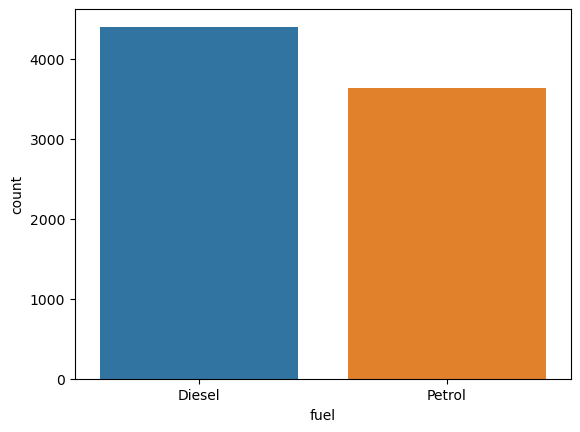

In [27]:
# Create countplot for type of fuel

sns.countplot(data = new_df, x = 'fuel')

According from the graph shows that there are higher number of Diesel car fuel than petrol car.

<AxesSubplot:xlabel='owner', ylabel='count'>

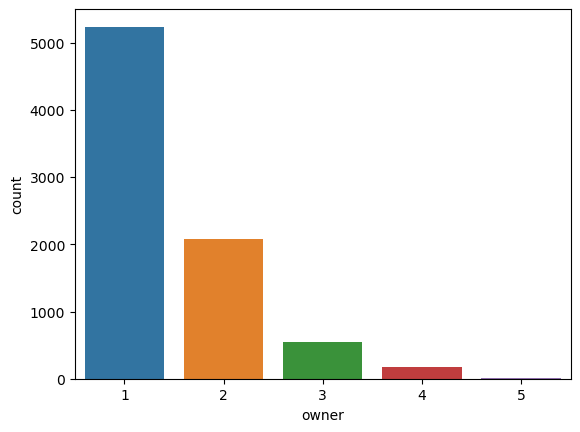

In [28]:
# Create countplot for type of owner

sns.countplot(data = new_df, x = 'owner')

<AxesSubplot:xlabel='seats', ylabel='count'>

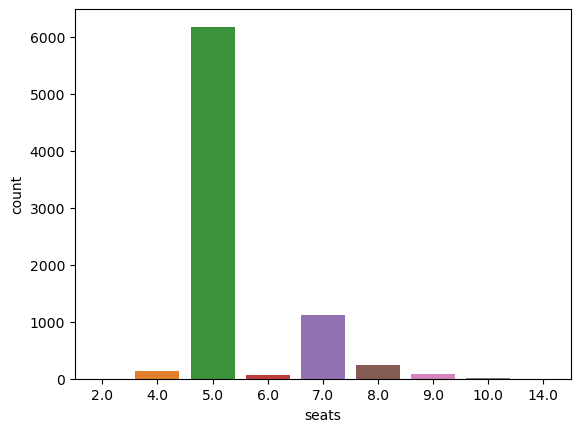

In [29]:
# Create countplot for seats type

sns.countplot(data = new_df, x = 'seats')

<AxesSubplot:xlabel='seller_type', ylabel='count'>

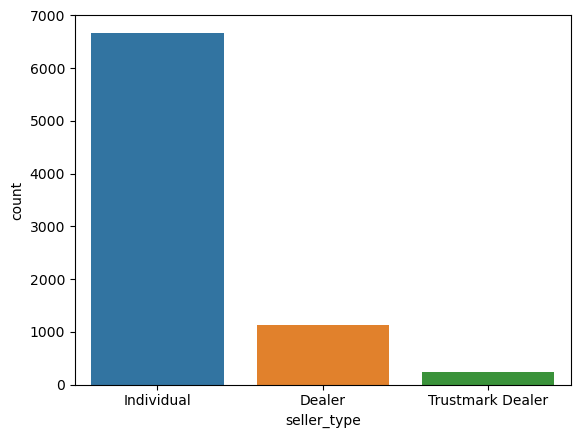

In [30]:
# Create countplot for seller type

sns.countplot(data = new_df, x = 'seller_type')

<AxesSubplot:xlabel='transmission', ylabel='count'>

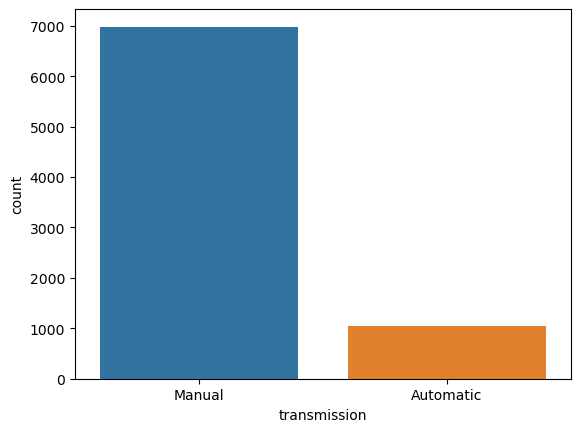

In [31]:
# Create countplot for type of transmission

sns.countplot(data = new_df, x = 'transmission')

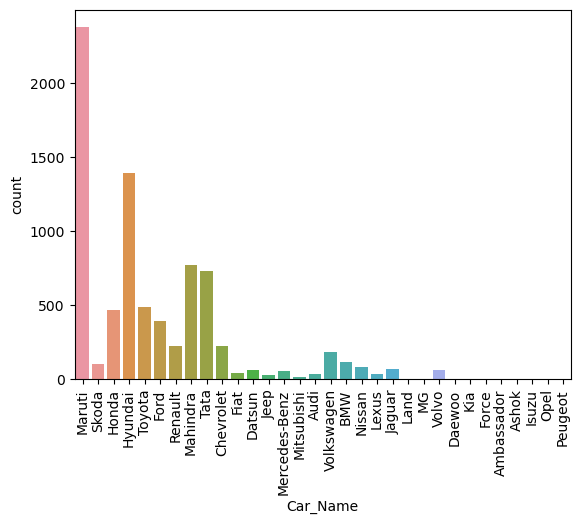

In [32]:
# Create countplot for car brand name

sns.countplot(data = new_df, x = 'Car_Name')
plt.xticks(rotation = 90)
plt.show()

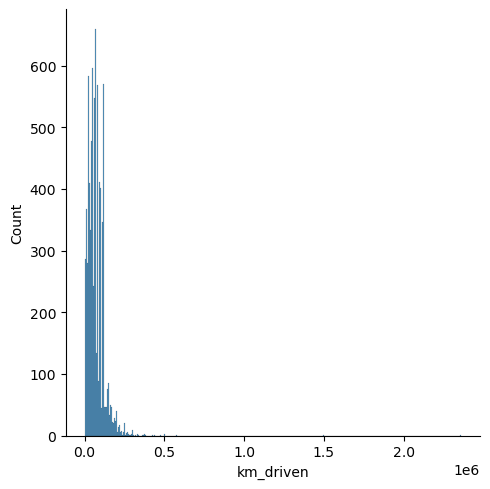

In [33]:
# Distribution plot for for km_driven
sns.displot(x = new_df["km_driven"])

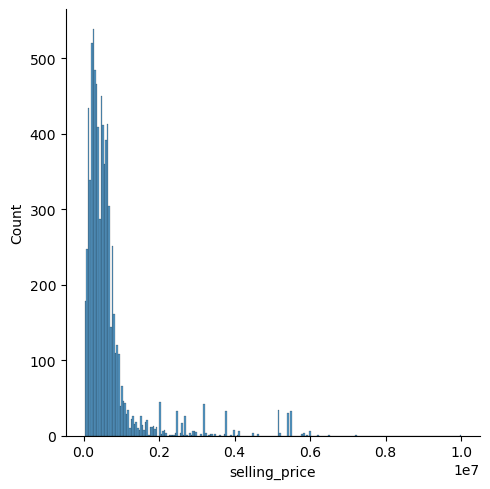

In [34]:
# Distribution plot for for selling price
sns.displot(x = new_df["selling_price"])

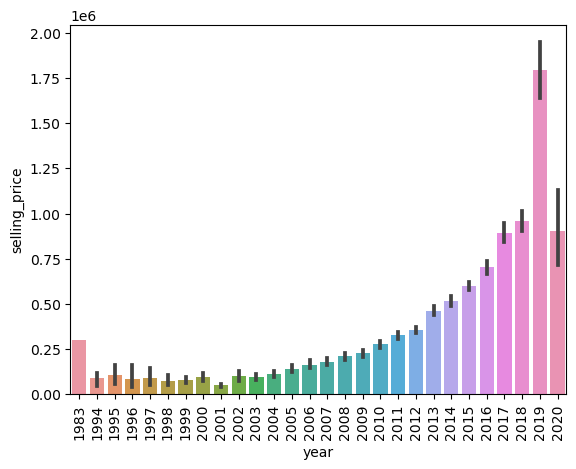

In [35]:
# Bar Chart for seling price in years
sns.barplot(data = new_df, x = "year", y = "selling_price")
plt.xticks(rotation = 90)
plt.show()

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

Text(0.5, 0, 'fuel')

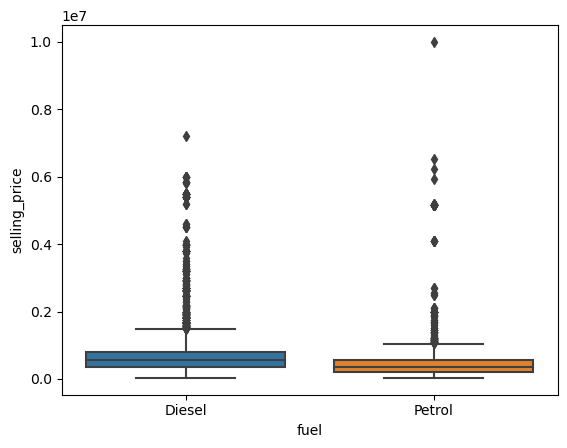

In [36]:
# Create boxplot of selling price of car in each types of fuel
sns.boxplot(x = new_df["fuel"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("fuel")


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Name         8033 non-null   object 
 1   year             8033 non-null   int64  
 2   selling_price    8033 non-null   int64  
 3   km_driven        8033 non-null   int64  
 4   fuel             8033 non-null   object 
 5   seller_type      8033 non-null   object 
 6   transmission     8033 non-null   object 
 7   owner            8033 non-null   int64  
 8   seats            7819 non-null   float64
 9   Mileage_Value    7819 non-null   float64
 10  Engine_Value     7819 non-null   float64
 11  Max_Power_Value  7825 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.0+ MB


Text(0.5, 0, 'seller_type')

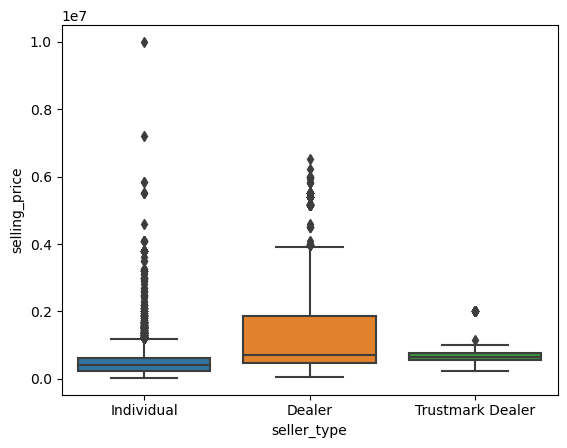

In [38]:
# Create boxplot of selling price of car in each types of seller
sns.boxplot(x = new_df["seller_type"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("seller_type")


Text(0.5, 0, 'transmission')

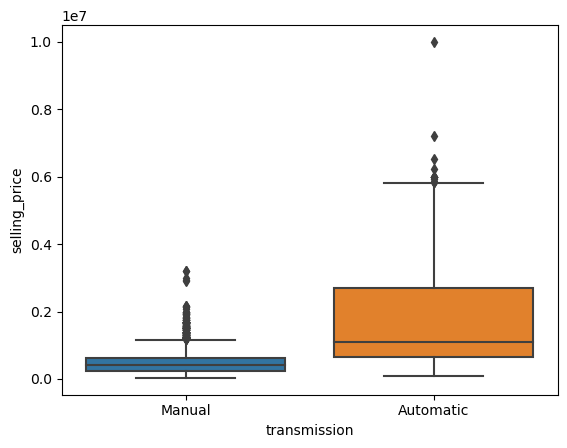

In [39]:
# Create boxplot of selling price of car in each types of transmission
sns.boxplot(x = new_df["transmission"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("transmission")


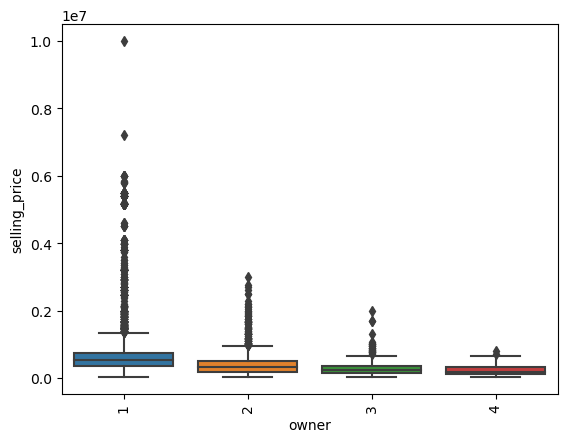

In [40]:
# Create boxplot of selling price of car in each types of owner car
new_df = new_df[new_df["owner"] != 5]
sns.boxplot(x = new_df["owner"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("owner")
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 0, 'seats')

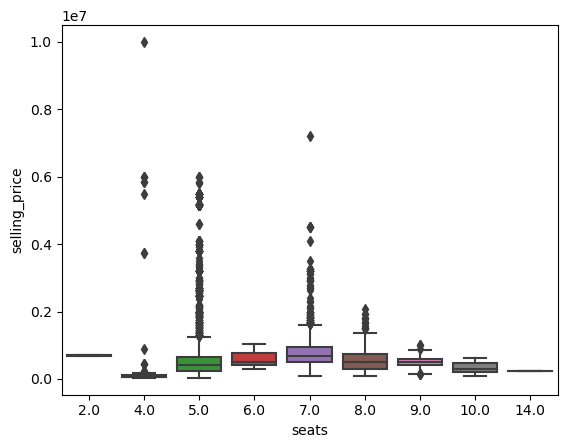

In [41]:
# Create boxplot of selling price of car in each numbers of seats
sns.boxplot(x = new_df["seats"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("seats")

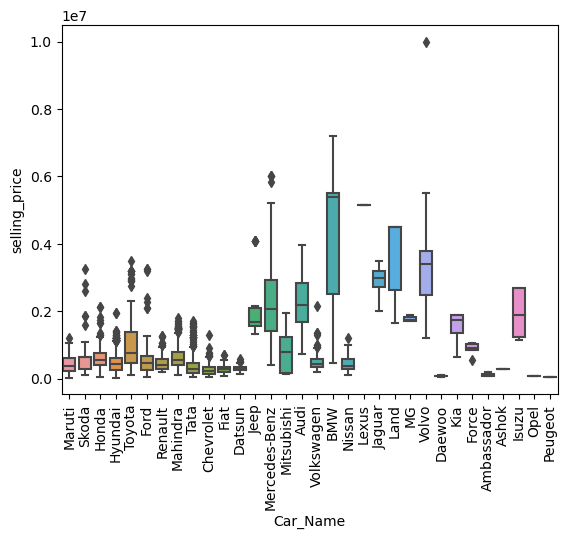

In [42]:
# Create boxplot of selling price of car in each car name
sns.boxplot(x = new_df["Car_Name"], y = new_df["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("Car_Name")
plt.xticks(rotation = 90)
plt.show()

In [43]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df["fuel"] = le.fit_transform(new_df["fuel"])
new_df["seller_type"] = le.fit_transform(new_df["seller_type"])
new_df["transmission"] = le.fit_transform(new_df["transmission"])
new_df.head()


,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
0,Maruti,2014,450000,145500,0,1,1,1,5.0,23.40,1248.0,74.00
1,Skoda,2014,370000,120000,0,1,1,2,5.0,21.14,1498.0,103.52
2,Honda,2006,158000,140000,1,1,1,3,5.0,17.70,1497.0,78.00
3,Hyundai,2010,225000,127000,0,1,1,1,5.0,23.00,1396.0,90.00
4,Maruti,2007,130000,120000,1,1,1,1,5.0,16.10,1298.0,88.20


<AxesSubplot:>

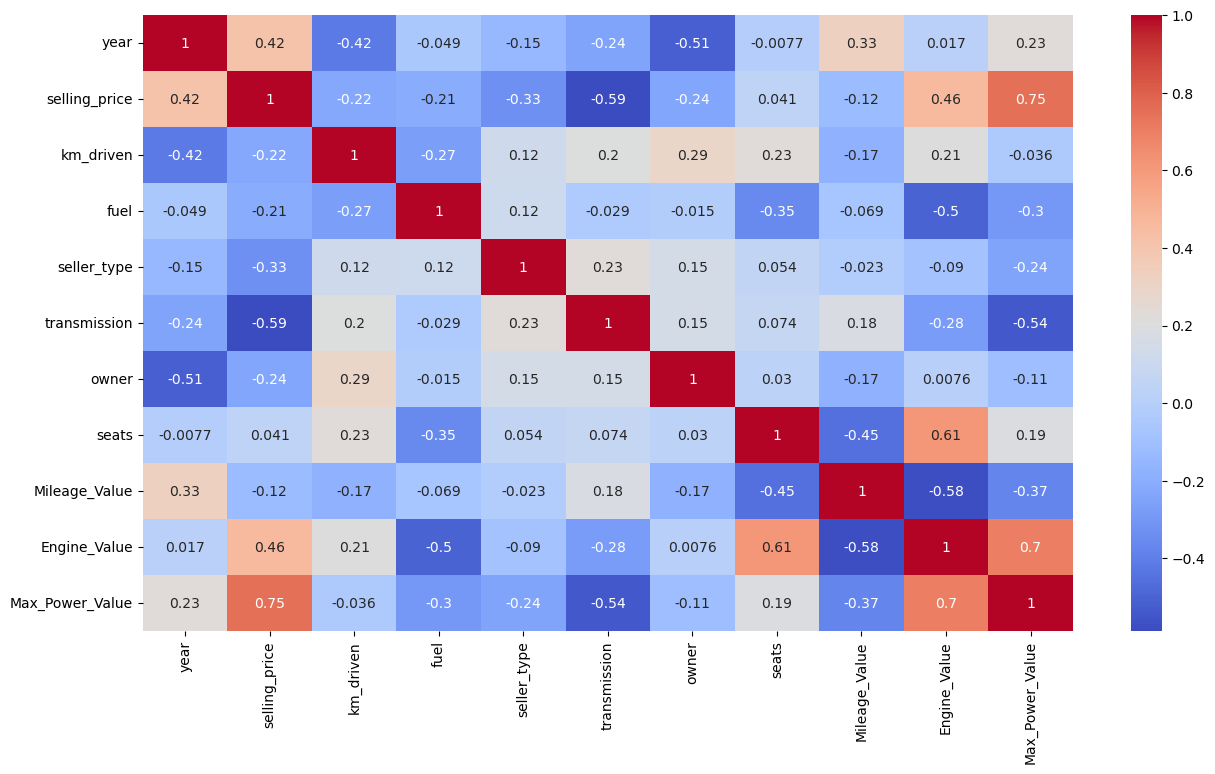

In [44]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

In [45]:
# !pip install ppscore

<AxesSubplot:xlabel='x', ylabel='y'>

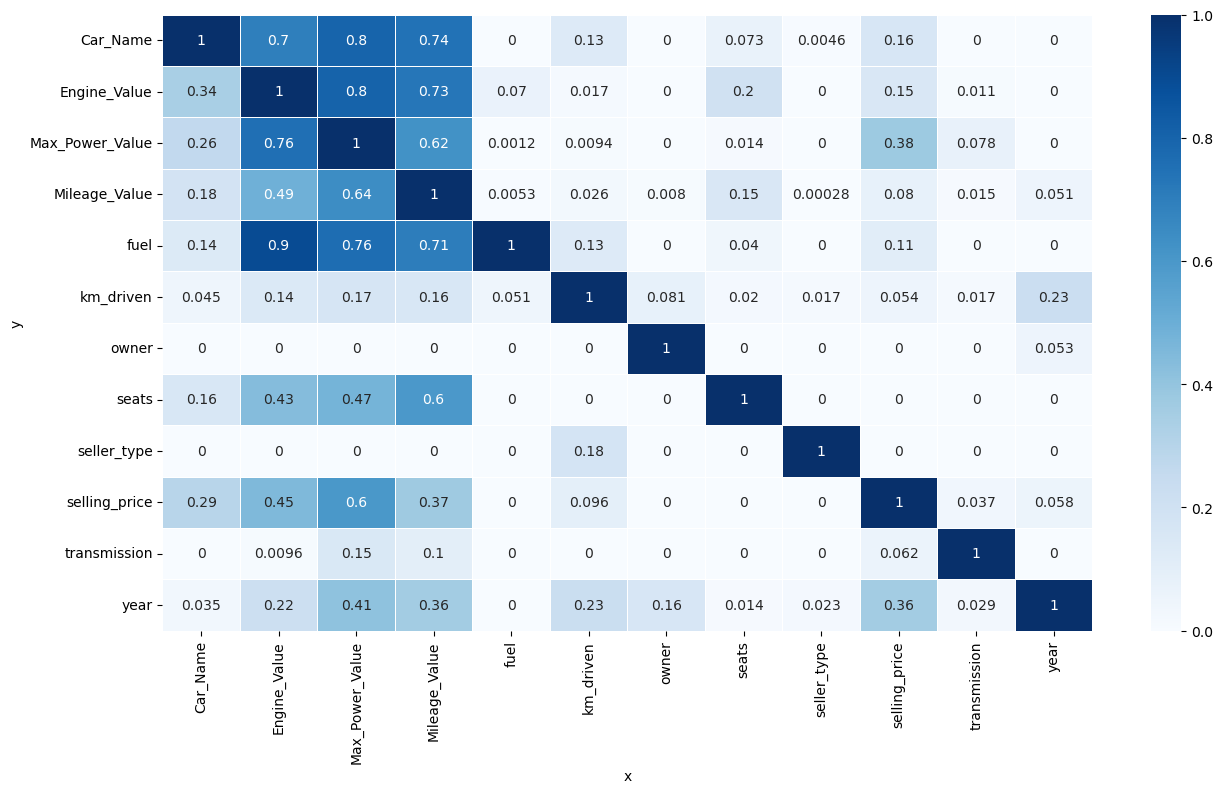

In [46]:
#Use Predictive power score to predict
import ppscore as pps

# before using pps, let's drop car name and year
dfcopy = new_df.copy()
dfcopy.drop(['Car_Name', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(new_df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3 Feature Engineering

From selling_price column is quite hard to see which car has the most expensive and the cheapest which I decide to decending the data in selling_price column.

In [47]:
sorted_new_df = new_df.sort_values(by='selling_price', ascending=False)
sorted_new_df

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
170,Volvo,2017,10000000,30000,1,1,0,1,4.0,42.00,1969.0,400.00
2938,BMW,2020,7200000,5000,0,1,0,1,7.0,13.38,2993.0,265.00
4766,BMW,2018,6000000,27000,0,0,0,1,4.0,17.09,2993.0,261.40
4101,BMW,2018,6000000,28156,0,0,0,1,4.0,17.09,2993.0,261.40
7713,Mercedes-Benz,2017,6000000,37000,0,0,0,1,5.0,13.50,2987.0,254.79
...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Maruti,2004,31504,110000,1,1,1,3,4.0,16.10,796.0,37.00
5965,Maruti,2000,31000,56194,1,1,1,4,4.0,16.10,796.0,37.00
6776,Hyundai,2000,30000,90000,1,1,1,3,NaN,NaN,NaN,NaN
2145,Maruti,2001,30000,10000,1,1,1,1,5.0,17.30,993.0,60.00


<AxesSubplot:>

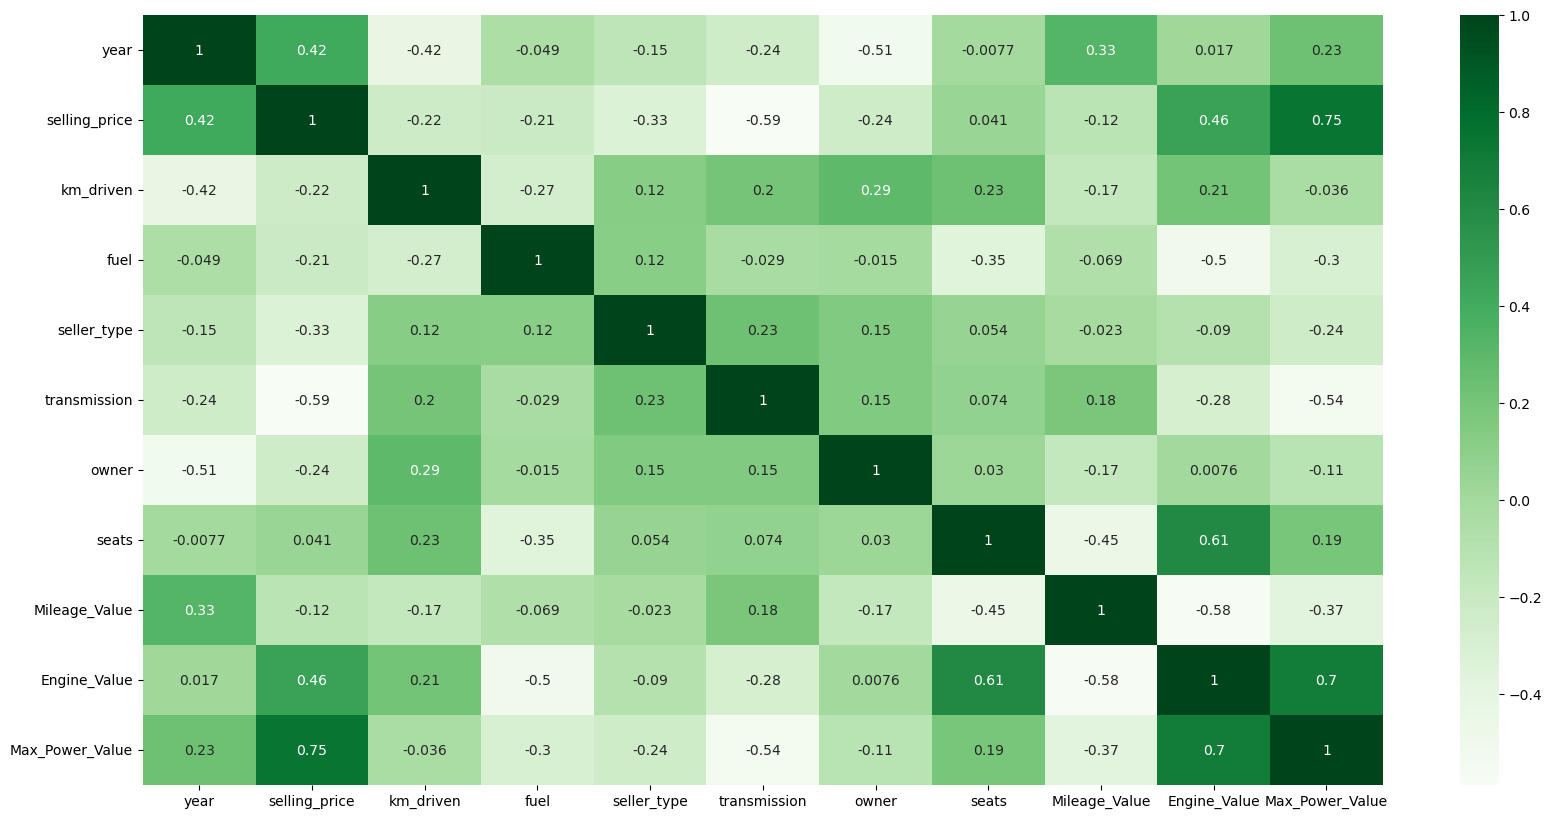

In [48]:
# Heat map
plt.figure(figsize = (20,10))
sns.heatmap(sorted_new_df.corr(), annot = True, cmap = "Greens")

<AxesSubplot:xlabel='x', ylabel='y'>

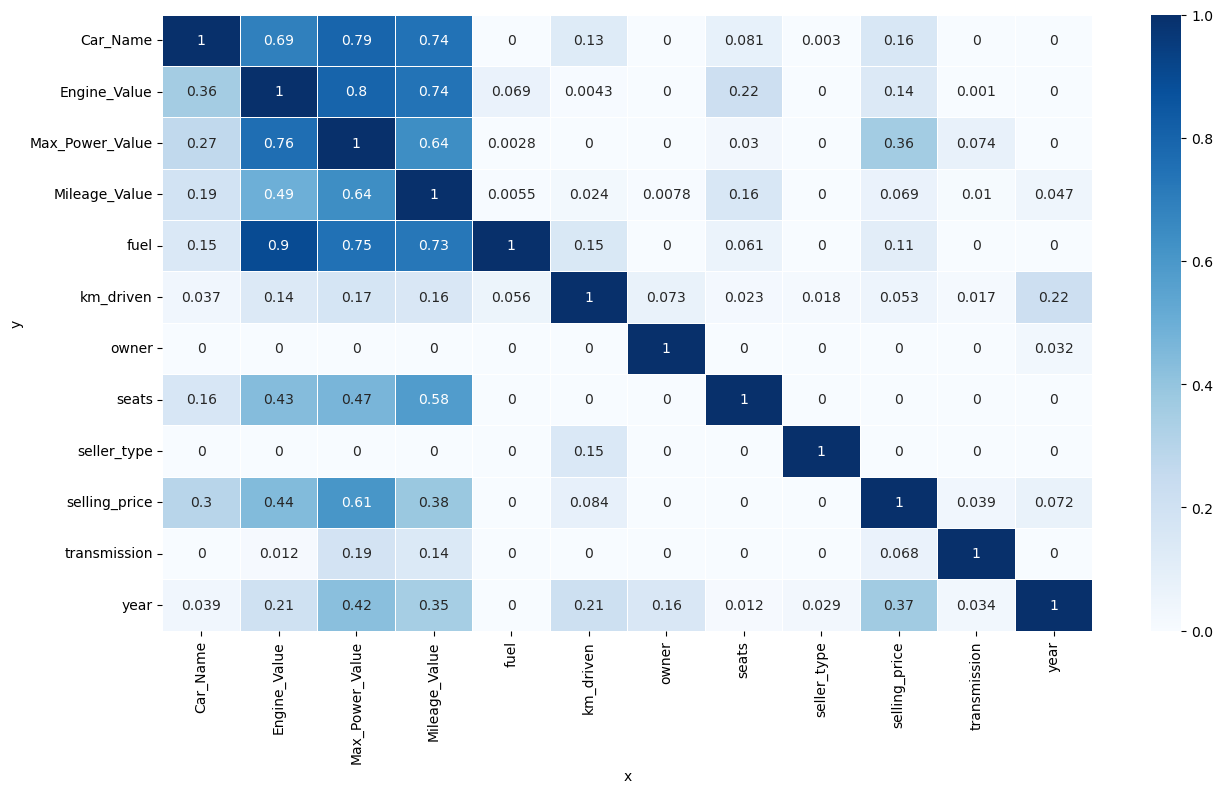

In [49]:
#Actual Prediction
dfcopy = sorted_new_df.copy()
dfcopy.drop(['Car_Name', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(sorted_new_df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 4 Feature Selection

From HeatMap shows that there have correlate between Mileage_Value,km_driven and Max_Power_Value

In [50]:
X = new_df[['km_driven','Max_Power_Value', 'Mileage_Value']]

In [51]:
new_df['selling_price'] = np.log(new_df['selling_price'])

In [52]:
new_df['selling_price'] = pd.qcut(x=new_df['selling_price'], q=4, labels=range(0, 4))
new_df.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage_Value,Engine_Value,Max_Power_Value
0,Maruti,2014,1,145500,0,1,1,1,5.0,23.40,1248.0,74.00
1,Skoda,2014,1,120000,0,1,1,2,5.0,21.14,1498.0,103.52
2,Honda,2006,0,140000,1,1,1,3,5.0,17.70,1497.0,78.00
3,Hyundai,2010,0,127000,0,1,1,1,5.0,23.00,1396.0,90.00
4,Maruti,2007,0,120000,1,1,1,1,5.0,16.10,1298.0,88.20


In [53]:
y_one_hot = pd.get_dummies(new_df['selling_price'], prefix="y")
y_one_hot

,y_0,y_1,y_2,y_3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
8123,0,1,0,0
8124,1,0,0,0
8125,0,1,0,0
8126,0,1,0,0


In [54]:
new_df['selling_price'].value_counts()

0    2050
1    2044
3    1991
2    1943
Name: selling_price, dtype: int64

In [55]:
y = new_df['selling_price']
k = len(set(y))
assert k == 4, f"{k=}"

In [56]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_one_hot_train, y_one_hot_test = train_test_split(X, y, y_one_hot, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_one_hot_train.shape, y_one_hot_test.shape


((5619, 3), (2409, 3), (5619,), (2409,), (5619, 4), (2409, 4))

## 5. Preprocessing

### Label selling price into discrete variable

### Null values

In [57]:
#check for null values
X_train.isna().sum()

km_driven            0
Max_Power_Value    149
Mileage_Value      154
dtype: int64

In [58]:
X_test.isna().sum()

km_driven           0
Max_Power_Value    59
Mileage_Value      60
dtype: int64

In [59]:
y_train.isna().sum()

0

In [60]:
y_test.isna().sum()

0

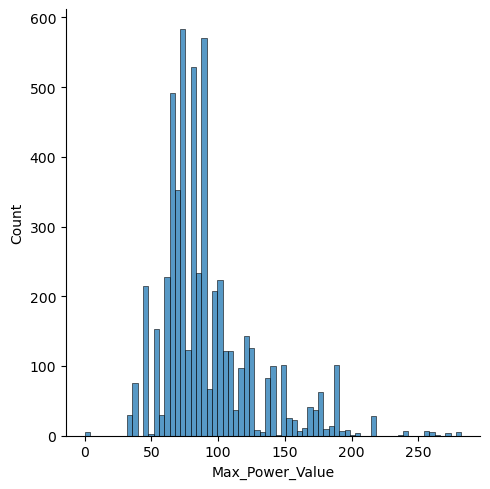

In [61]:
# Check distribution of max_power
sns.displot(data=X_train, x= 'Max_Power_Value')

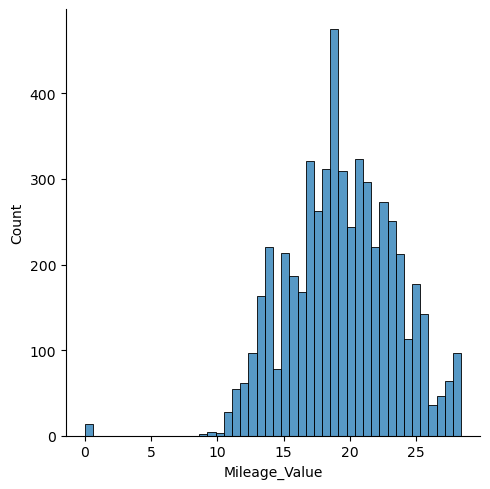

In [62]:
#Check distribution of mileage
sns.displot(data=X_train, x = 'Mileage_Value')

According from Max_Power_Value graph and Mileage_Value graph show that the Mileage_Value graph shape looks like Normal Distribution but the Max_Power_Value is not. To sum up, it can use Means for mileages and Median for Max_Power

In [63]:
X_train['Mileage_Value']

6853    13.58
1495    15.96
7904    20.77
1281    18.80
1421    23.00
        ...  
5293    20.36
5461    20.51
865     20.77
7701    22.37
7366    21.40
Name: Mileage_Value, Length: 5619, dtype: float64

In [64]:
# Fill training set 
X_train['Max_Power_Value'].fillna(X_train['Max_Power_Value'].median(), inplace=True)
X_train['Mileage_Value'].fillna(X_train['Mileage_Value'].mean(), inplace=True)

In [65]:
# Fill testing set 
X_test['Max_Power_Value'].fillna(X_train['Max_Power_Value'].median(), inplace=True)
X_test['Mileage_Value'].fillna(X_train['Mileage_Value'].mean(), inplace=True)

In [66]:
X_train.isnull().sum()

km_driven          0
Max_Power_Value    0
Mileage_Value      0
dtype: int64

In [67]:
X_test.isnull().sum()

km_driven          0
Max_Power_Value    0
Mileage_Value      0
dtype: int64

<AxesSubplot:xlabel='Mileage_Value'>

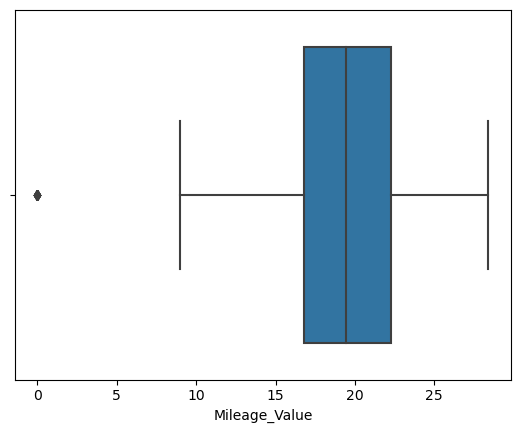

In [68]:
#Checking Outlier
sns.boxplot(data = X_train, x = 'Mileage_Value')

In [69]:
# Check which row in train_set has mileage lower than 5
X_train[X_train['Mileage_Value']<5]

,km_driven,Max_Power_Value,Mileage_Value
6629,80000,70.00,0.0
7337,60000,194.00,0.0
644,28900,65.00,0.0
5900,5000,70.00,0.0
785,90000,62.00,0.0
1649,128000,62.00,0.0
7002,80000,62.10,0.0
5846,28100,103.25,0.0
2137,64788,115.00,0.0
1676,110000,165.00,0.0


<AxesSubplot:xlabel='Max_Power_Value'>

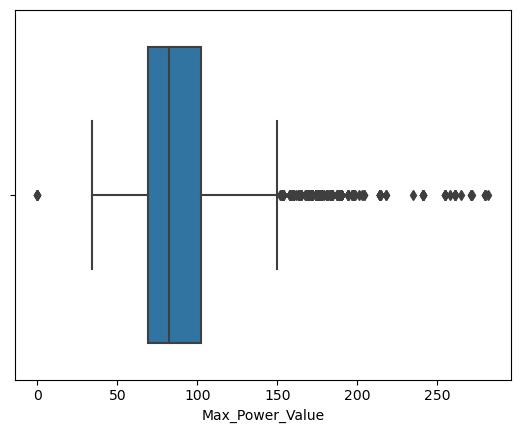

In [70]:
sns.boxplot(data = X_train, x = 'Max_Power_Value')

In [71]:
#Check Shape
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [72]:
# pip install xgboost

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost import XGBRegressor


kfold = KFold(n_splits= 3)
param_grid = {'max_depth': [5, 10, 15], 'learning_rate': [0.01, 0.02, 0.05, 0.1],
              'n_estimators': [200, 300, 400, 500, 600]}

rf = XGBRegressor(random_state = 10)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')


grid.fit(X_train, y_train);

## 6 Model Selection

In [74]:
#I make two docker containers to easier to run which one for coding and another for mlflow which running on port 50000
import mlflow
import os
import warnings
import sys
import math 
import numpy as np
import pandas as pd


mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
mlflow.set_experiment(experiment_name="st124022-a3")

<Experiment: artifact_location='mlflow-artifacts:/630018604215604077', creation_time=1696092360645, experiment_id='630018604215604077', last_update_time=1696092360645, lifecycle_stage='active', name='st124022-a3', tags={}>

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time


In [76]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
column = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.array(y_train)
Y_test = np.array(y_test)

In [77]:
class LogisticRegression:
    
    def __init__(self, regularization, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = regularization
        self.k = k
        self.n = n
        self.method = method
        self.alpha = alpha
        self.max_iter = max_iter
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []

        params = {
            "reg": type(self).__name__,
            "method": self.method,
            "k": self.k,
            "n": self.n,
            "alpha": self.alpha,
            "max_iter": self.max_iter
        }
        mlflow.log_params(params=params)
    
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
        
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        term_a = np.sum(Y*np.log(h))
        loss = - term_a / m
        error = h - Y

        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)

        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        dot = X @ W
        return self.softmax(dot)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y_test, y_pred):
        return np.count_nonzero(y_test==y_pred) / len(y_test)

    def precision(self, y_test, y_pred, c=0):
        tp = np.nansum(np.logical_and(y_test == c, y_pred == c))
        fp = np.nansum(np.logical_and(y_test != c, y_pred == c))

        if tp + fp == 0:
            return 0
        else:
            return tp / (tp + fp)
    
    def recall(self, y_test, y_pred, c=0):
        tp = np.nansum(np.logical_and(y_test == c, y_pred == c))
        fn = np.nansum(np.logical_and(y_test == c, y_pred != c))
        
        if tp + fn == 0:
            return 0
        else:
            return tp / (tp + fn)
    
    def f1_score(self, y_test, y_pred, c=0):
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)

        if precision + recall == 0:
            return 0
        else:
            return 2 * precision * recall / (precision + recall)
    
    def macro_precision(self, y_test, y_pred):
        precisions = [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k
    
    def macro_recall(self, y_test, y_pred):
        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k
    
    def macro_f1(self, y_test, y_pred):
        f1s = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k
    
    def weighted_precision(self, y_test, y_pred):
        precisions = [np.count_nonzero(y_test == c)  / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)
    
    def weighted_recall(self, y_test, y_pred):
        recalls = [np.count_nonzero(y_test == c)  / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)
    
    def weighted_f1(self, y_test, y_pred):
        f1s = [np.count_nonzero(y_test == c)  / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)
    
    def classification_report(self, y_test, y_pred):
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k))+["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c),
                self.recall(y_test, y_pred, c),
                self.f1_score(y_test, y_pred, c)] for c in range(self.k)]

        report.append(["", "", self.accuracy(y_test, y_pred)])

        report.append([self.macro_precision(y_test, y_pred),
                    self.macro_recall(y_test, y_pred),
                    self.macro_f1(y_test, y_pred)])

        report.append([self.weighted_precision(y_test, y_pred),
                    self.weighted_recall(y_test, y_pred),
                    self.weighted_f1(y_test, y_pred)])
        
        return pd.DataFrame(report, index=idx, columns=cols)

In [78]:
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta):
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
        
class Ridge(LogisticRegression):
    
    def __init__(self, l, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, k, n, method, alpha, max_iter)

class Normal(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = None
        super().__init__(self.regularization, k, n, method, alpha, max_iter)
        

In [79]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [80]:
y_one_hot_train = np.array(y_one_hot_train)
y_one_hot_test = np.array(y_one_hot_test)

In [81]:
test_model = Ridge(0.1, k, X_train.shape[1], "minibatch", max_iter=10000)
test_model.fit(X_train, np.array(y_one_hot_train))
yhat = test_model.predict(X_test)

Loss at iteration 0 1.4912351443246934
Loss at iteration 500 1.103448636937811
Loss at iteration 1000 1.083584635950433
Loss at iteration 1500 1.0693813549655176
Loss at iteration 2000 1.1074443031789205
Loss at iteration 2500 1.1176009612549571
Loss at iteration 3000 1.0774632375413469
Loss at iteration 3500 1.1050199330491854
Loss at iteration 4000 1.0818035851359085
Loss at iteration 4500 1.0873913239767001
Loss at iteration 5000 1.0874524057621768
Loss at iteration 5500 1.0948333655177755
Loss at iteration 6000 1.0979130984940288
Loss at iteration 6500 1.0885749854475901
Loss at iteration 7000 1.0914316263276225
Loss at iteration 7500 1.1649536771650917
Loss at iteration 8000 1.0891159846301748
Loss at iteration 8500 1.095724430688911
Loss at iteration 9000 1.076195045643345
Loss at iteration 9500 1.0814677672315034
time taken: 8.9456148147583


In [82]:
print(classification_report(y_test, yhat))
print("="*30)
print(test_model.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.48      0.94      0.64       633
           1       0.51      0.12      0.20       627
           2       0.44      0.16      0.24       561
           3       0.55      0.77      0.64       588

    accuracy                           0.50      2409
   macro avg       0.50      0.50      0.43      2409
weighted avg       0.50      0.50      0.43      2409

         precision    recall  f1-score
0          0.48366  0.935229  0.637588
1         0.509804  0.124402  0.200000
2         0.442308  0.163993  0.239272
3         0.549757  0.770408  0.641643
accuracy                      0.504359
macro     0.496382  0.498508  0.429626
weighted  0.496968  0.504359  0.431926


In [83]:
regs = ["Normal", "Ridge"]
methods = ["batch", "sto", "minibatch"]
alphas = [0.01, 0.005, 0.001, 0.0005, 0.0001]

def run_experiment(reg, method, alpha, k):
    mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True)

    if reg == "Normal":
        params = {"k": k, "n": X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
    else:
        params = {"k": k, "n": X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}

    with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
        print("=" * 30)
        print(reg, method)
        print(f"alpha: {alpha}")
        print("=" * 30)
        type_of_regression = str_to_class(reg)
        model = type_of_regression(**params)
        model.fit(X_train, y_one_hot_train)
        yhat = model.predict(X_test)

        accuracy = model.accuracy(y_test, yhat)
        mlflow.log_metric(key="accuracy", value=accuracy)

        for c in range(k):
            f1 = model.f1_score(y_test, yhat, c)
            mlflow.log_metric(key=f"class_{c}_f1", value=f1)

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

        print(classification_report(y_test, yhat))
        print("\n")

    mlflow.end_run()

for reg in regs:
    for method in methods:
        for alpha in alphas:
            run_experiment(reg, method, alpha, k)

mlflow.end_run()


Normal batch
alpha: 0.01
Loss at iteration 0 1.2526188003868144
Loss at iteration 500 6.298845416273152
Loss at iteration 1000 6.298845416273152
Loss at iteration 1500 6.298845416273151
Loss at iteration 2000 6.298845416273152
Loss at iteration 2500 6.298845416273153
Loss at iteration 3000 6.298845416273151
Loss at iteration 3500 6.298845416273149
Loss at iteration 4000 6.298845416273152
Loss at iteration 4500 6.298845416273152
Loss at iteration 5000 6.298845416273152
Loss at iteration 5500 6.298845416273151
Loss at iteration 6000 6.298845416273152
Loss at iteration 6500 6.298845416273152
Loss at iteration 7000 6.298845416273151
Loss at iteration 7500 6.298845416273152
Loss at iteration 8000 6.298845416273151
Loss at iteration 8500 6.298845416273152
Loss at iteration 9000 6.298845416273151
Loss at iteration 9500 6.298845416273152
time taken: 20.95256757736206
              precision    recall  f1-score   support

           0       0.55      0.47      0.51       633
           1       

## 7 Testing

In [88]:
import pickle
filename = r'C:\Users\Munthitra\Desktop\Chaklam\a3\model (1).pkl'
loaded_model = pickle.load(open(filename, 'rb'))

yhat = loaded_model.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.53      0.87      0.66       633
           1       0.49      0.28      0.36       627
           2       0.47      0.30      0.36       561
           3       0.60      0.67      0.64       588

    accuracy                           0.54      2409
   macro avg       0.52      0.53      0.50      2409
weighted avg       0.52      0.54      0.51      2409



# 8. Inference 

In [89]:
print("test sample", X_train[16])
print("label_figure", y_train[16])

test sample [ 0.83033526 -0.05063609  0.90418823]
label_figure 0


In [90]:
yhat = loaded_model.predict(X_train[[16]])
print(yhat[0])

1


In [91]:
X_train[[16]]

array([[ 0.83033526, -0.05063609,  0.90418823]])